## Part 1 - data visualization

#### Preliminaries

First we import the libraries we will need, and the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spst, scipy.spatial as sp, scipy.cluster.hierarchy as hc
import seaborn as sns
from biokit.viz import corrplot, heatmap
import dcor
import copy

#### Data loading and inspection

The data (public) is from the paper **Many correlation coefficients, null hypoteses, and high value (Hunt, 2013, Reference 1)**; I used it previously in  my [Geoscience ML notebook 2](https://github.com/mycarta/predict/blob/master/Geoscience_ML_notebook_2.ipynb)
The dependent variable to be predicted, Y, is oil production (measured in tens of barrels of oil per day) from a marine barrier sand.
Independent variables are:

- Gross pay in meters

- Phi-h, with a 3% porosity cut-off

- Position in the reservoir. This is a ranked variable where a value close to 1 means the upper reservoir facies, a value close to 2 means the middle reservoir facies, and a value close to 3 means the lower reservoir facies.

- Pressure drawdown in MPa.

- 2 random variables

- 1 variable added by me (see my [Geoscience ML support notebook](https://github.com/mycarta/predict/blob/master/Geoscience_ML_support_for_notebook_2.ipynb)) as a log transform of Gross pay to simulate extremely highly correlated independent variables. 

In [2]:
data = pd.read_csv('Table2_Hunt_2013_edit.csv')

In [3]:
data

,Gross pay,Phi-h,Position,Pressure,Random 1,Random 2,Gross pay transform,Production
0,0.1,0.5,2.1,19,5,379,3.54,15.10
1,1.0,4.0,1.1,16,13,269,5.79,21.30
2,1.9,19.0,1.0,14,12,245,8.51,22.75
3,3.1,21.7,2.1,17,6,273,11.52,15.72
4,4.1,24.6,2.9,11,10,237,10.16,7.71
5,4.9,39.2,1.1,12,7,278,11.14,22.67
6,5.9,23.6,2.1,13,13,241,15.04,18.11
7,7.0,63.0,2.0,13,20,269,15.10,24.30
8,8.1,72.9,2.9,14,1,248,14.49,24.04
9,8.9,35.6,2.8,16,1,210,16.90,25.11


We can print a list of the variables.

In [4]:
print (list(data))

['Gross pay', 'Phi-h', 'Position', 'Pressure', 'Random 1', 'Random 2', 'Gross pay transform', 'Production']


We can rearrange variable columns, then print a summary of the data and compare the row count to show there are no missing data points.

In [5]:
data = data.loc[:, ['Position', 'Gross pay', 'Phi-h', 'Pressure', 'Random 1', 'Random 2', 'Gross pay transform', 'Production']]
data.describe()

,Position,Gross pay,Phi-h,Pressure,Random 1,Random 2,Gross pay transform,Production
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.885714,9.823810,68.880952,15.285714,10.190476,292.714286,16.579524,33.428571
std,0.708721,5.948521,45.167894,2.759400,6.439092,59.429069,6.543793,15.141909
min,1.000000,0.100000,0.500000,10.000000,1.000000,210.000000,3.540000,7.710000
25%,1.100000,4.900000,24.600000,14.000000,6.000000,245.000000,11.520000,22.670000
50%,2.000000,10.000000,72.900000,16.000000,10.000000,273.000000,16.900000,36.420000
75%,2.200000,15.100000,100.000000,17.000000,13.000000,340.000000,21.970000,44.200000
max,2.900000,19.100000,160.000000,20.000000,21.000000,395.000000,29.250000,59.200000


We can also explicitly test to ensure data does not have no missing measurements.

In [6]:
data.isnull().values.any()

False

#### Visualization with a custom correlation matrix

##### Using the [Biokit library](https://github.com/biokit/biokit/blob/master/notebooks/viz/corrplot.ipynb).

Baaed on:

- Bivariate Spearman correlation coefficient or Distance correlation

Displays bivariate ellipses in the lower triangle:
- ellipticity is proportional to the correlation coefficient
- direction and colour indicate whether positive or negative correlation

Notice that the correlation matrix is reordered by clastering correlated variables to facilitate interpretation. 
The more interestign ones are close to the diagonal.


Read more here:

- https://blogs.sas.com/content/iml/2018/05/02/reorder-variables-correlation-heat-map.html      
- https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html  
- https://github.com/biokit/biokit/blob/master/biokit/viz/corrplot.py


In [7]:
corr = data.corr(method='spearman')

In [8]:
corr

,Position,Gross pay,Phi-h,Pressure,Random 1,Random 2,Gross pay transform,Production
Position,1.000000,-0.028835,-0.142863,-0.017241,0.013154,-0.501658,-0.015073,-0.328323
Gross pay,-0.028835,1.000000,0.875325,0.136672,0.188988,0.187135,0.980519,0.868831
Phi-h,-0.142863,0.875325,1.000000,0.050595,0.193550,0.367122,0.828571,0.861039
Pressure,-0.017241,0.136672,0.050595,1.000000,-0.127601,0.117364,0.191866,0.384390
Random 1,0.013154,0.188988,0.193550,-0.127601,1.000000,-0.069449,0.207887,0.117303
Random 2,-0.501658,0.187135,0.367122,0.117364,-0.069449,1.000000,0.165692,0.331384
Gross pay transform,-0.015073,0.980519,0.828571,0.191866,0.207887,0.165692,1.000000,0.854545
Production,-0.328323,0.868831,0.861039,0.384390,0.117303,0.331384,0.854545,1.000000


In [9]:
data=data.drop(columns=['Gross pay transform'])
corr = data.corr(method='spearman')
corr

,Position,Gross pay,Phi-h,Pressure,Random 1,Random 2,Production
Position,1.000000,-0.028835,-0.142863,-0.017241,0.013154,-0.501658,-0.328323
Gross pay,-0.028835,1.000000,0.875325,0.136672,0.188988,0.187135,0.868831
Phi-h,-0.142863,0.875325,1.000000,0.050595,0.193550,0.367122,0.861039
Pressure,-0.017241,0.136672,0.050595,1.000000,-0.127601,0.117364,0.384390
Random 1,0.013154,0.188988,0.193550,-0.127601,1.000000,-0.069449,0.117303
Random 2,-0.501658,0.187135,0.367122,0.117364,-0.069449,1.000000,0.331384
Production,-0.328323,0.868831,0.861039,0.384390,0.117303,0.331384,1.000000


In [10]:
c = corrplot.Corrplot(corr)

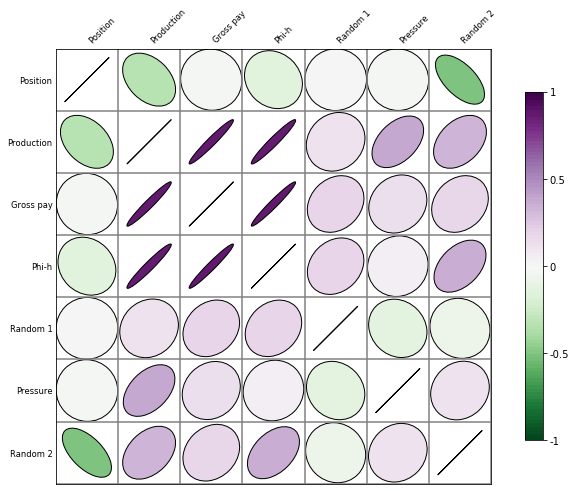

In [11]:
c.plot(method='ellipse', cmap='PRGn_r', shrink=1, rotation=45)
fig = plt.gcf()
fig.set_size_inches(10, 8)
#plt.savefig('103_05-12_ellipses_cc_all_curv1.png', dpi=500, bbox_inches='tight', pad_inches=0.2)

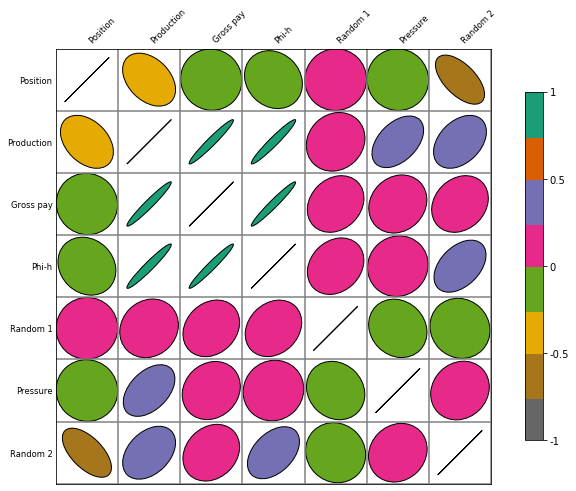

In [12]:
c.plot(method='ellipse', cmap='Dark2_r', shrink=1, rotation=45)
fig = plt.gcf()
fig.set_size_inches(10, 8)
#plt.savefig('103_05-12_ellipses_cc_all_curv1.png', dpi=500, bbox_inches='tight', pad_inches=0.2)

#### Distance correlation

Distance correlation from the [dcor library](https://github.com/vnmabus/dcor) and applied using a modification from [this SO answer on Euclidean distance](https://stackoverflow.com/a/29731899/1034648)

In [13]:
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2)
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))
pd.options.display.float_format = '{:,.2f}'.format
rslt

,Position,Gross pay,Phi-h,Pressure,Random 1,Random 2,Production
Position,1.00,0.28,0.32,0.22,0.32,0.54,0.45
Gross pay,0.28,1.00,0.89,0.34,0.32,0.45,0.91
Phi-h,0.32,0.89,1.00,0.27,0.35,0.54,0.88
Pressure,0.22,0.34,0.27,1.00,0.27,0.31,0.43
Random 1,0.32,0.32,0.35,0.27,1.00,0.23,0.29
Random 2,0.54,0.45,0.54,0.31,0.23,1.00,0.54
Production,0.45,0.91,0.88,0.43,0.29,0.54,1.00


In [14]:
c1 = corrplot.Corrplot(rslt)

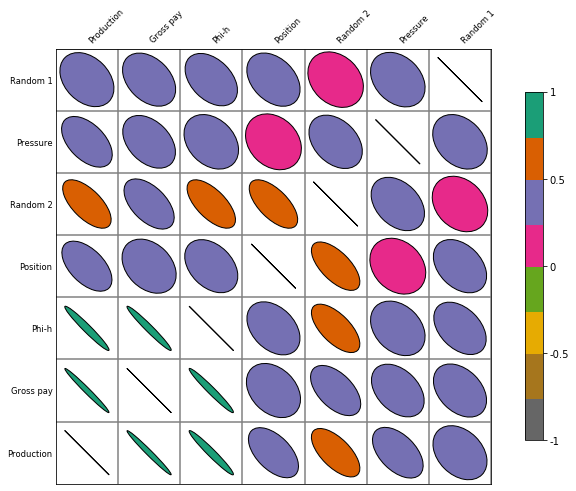

In [15]:
c1.plot(method='ellipse', cmap='Dark2_r', shrink=1, rotation=45)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.gcf().get_axes()[0].invert_yaxis();
#plt.savefig('103_05-12_ellipses_cc_all_curv1.png', dpi=500, bbox_inches='tight', pad_inches=0.2)

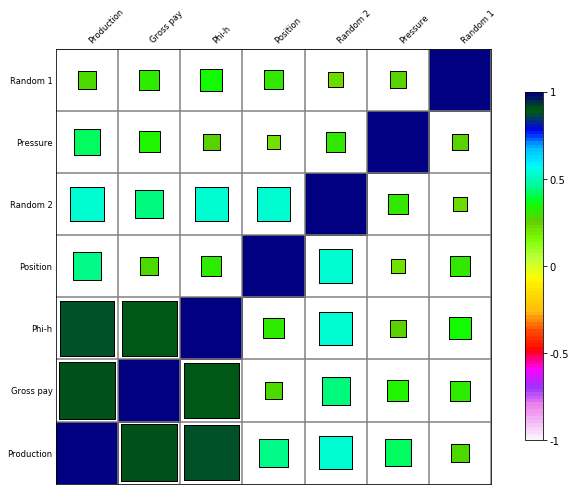

In [16]:
c1.plot(method='rectangle', cmap='gist_ncar_r', shrink=1, rotation=45)
fig = plt.gcf()
fig.set_size_inches(10, 8)
#plt.savefig('103_05-12_ellipses_cc_all_curv1.png', dpi=500, bbox_inches='tight', pad_inches=0.2)
plt.gcf().get_axes()[0].invert_yaxis();

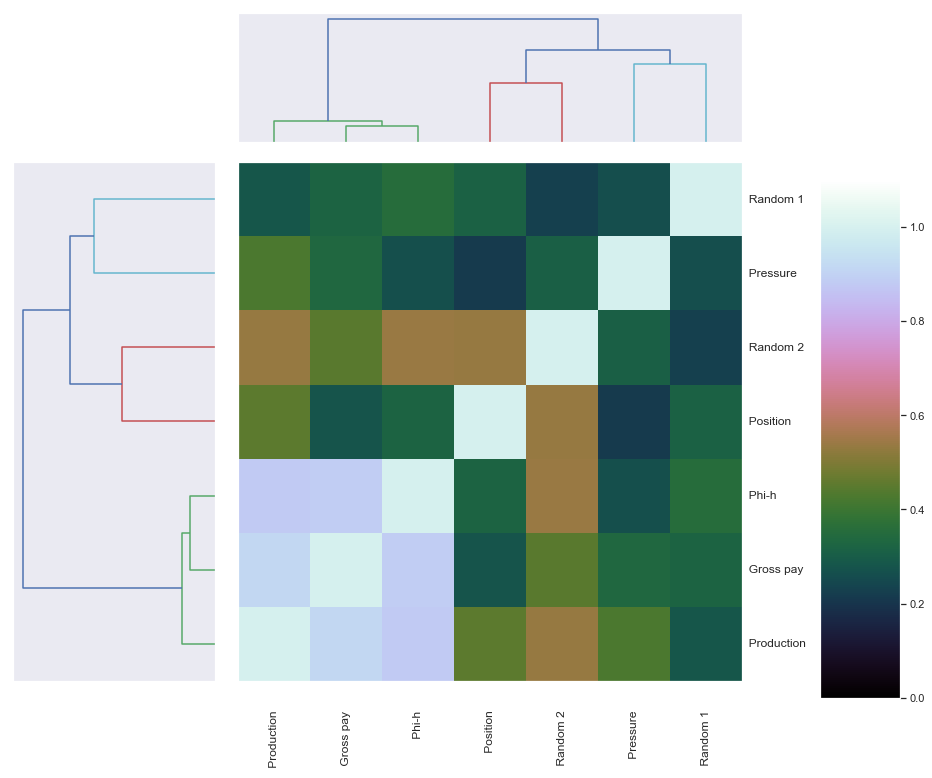

In [47]:
h = heatmap.Heatmap(rslt)
h.plot(vmin=0.0, vmax=1.1, cmap='cubehelix')
fig = plt.gcf()
fig.set_size_inches(14, 12)

plt.gcf().get_axes()[1].invert_xaxis();
#plt.gcf().get_axes()[1].invert_yaxis()
#plt.gcf().get_axes()[2].invert_yaxis()


# creating distance correlation matrix 

The p-values are is different form the results Thomas gets.

Try to replicate his work using rpy2

https://rpy2.readthedocs.io/en/version_2.8.x/introduction.html

---------- Forwarded message ---------
From: Carlos Ramos Carreño <vnmabus@gmail.com>
Date: Thu, Mar 28, 2019 at 11:00 AM
Subject: Re: question on dcor
To: Matteo Niccoli <matteo.niccoli@gmail.com>


Hello Matteo,

The sample distance covariance/correlation is completely determined given the vectors. Maybe what you are referring to is the independence test based on distance covariance. This is implemented in dcor as dcor.independence.distance_covariance_test and provides a p-value.

If your friends know about the energy package in R, maybe you can use the page in the dcor docs to see the equivalences:

https://dcor.readthedocs.io/en/latest/energycomparison.html

If you have any problem/suggestion with dcor, do not hesitate to open an issue in Github.
Best regards
On 28/3/19 17:50, Matteo Niccoli wrote:
Hello Carlos

I have been using your dcor library to calculate distance correlation between variables.
Is there a way to get also the P-values for the distance correlation for each pair of vectors?

I know this is tricky, I am told by friends that use R (I do not) that even in there you have to use bootstrapping to get it.

Thanks a lot,
Matteo


In [ ]:
https://dcor.readthedocs.io/en/latest/energycomparison.html

In [76]:
print (dcor.distance_correlation(data['Production'], data['Gross pay']))
print(dcor.independence.distance_covariance_test(data['Production'], data['Gross pay'], exponent=1.0, num_resamples=2000))

0.9115769728358094
HypothesisTest(p_value=0.0004997501249375312, statistic=820.449086707699)


In [77]:
print (dcor.distance_correlation(data['Production'], data['Phi-h']))
print(dcor.independence.distance_covariance_test(data['Production'], data['Phi-h'], exponent=1.0, num_resamples=2000))

0.8774833789239173
HypothesisTest(p_value=0.0004997501249375312, statistic=5539.646308605982)


In [78]:
print (dcor.distance_correlation(data['Production'], data['Position']))
print(dcor.independence.distance_covariance_test(data['Production'], data['Position'], exponent=1.0, num_resamples=2000))

0.4544859441230127
HypothesisTest(p_value=0.08445777111444278, statistic=26.500028506640753)


In [79]:
print (dcor.distance_correlation(data['Production'], data['Pressure']))
print(dcor.independence.distance_covariance_test(data['Production'], data['Pressure'], exponent=1.0, num_resamples=2000))

0.42670567748085175
HypothesisTest(p_value=0.14642678660669664, statistic=77.31139185833065)


In [80]:
print (dcor.distance_correlation(data['Production'], data['Random 1']))
print(dcor.independence.distance_covariance_test(data['Production'], data['Random 1'], exponent=1.0, num_resamples=2000))

0.28577140836237763
HypothesisTest(p_value=0.7306346826586707, statistic=83.72155490767732)


In [81]:
print (dcor.distance_correlation(data['Production'], data['Random 2']))
print(dcor.independence.distance_covariance_test(data['Production'], data['Random 2'], exponent=1.0, num_resamples=2000))

0.5358902437187533
HypothesisTest(p_value=0.02798600699650175, statistic=2921.197054313788)


In [63]:
def dist_corr(X, Y, p-val=True, n-runs=2000):
    """ Distance correlation with the p-value
    """
    dc = dcor.distance_correlation(X, Y)
    pv = dcor.independence.distance_covariance_test(X, Y, exponent=1.0, num_resamples=n-runs)[0]

    if p-val:
        return (dc, pv)
    else:
        return dc

In [64]:
def corrfunc(x, y, **kws):
    d, p = dist_corr(x,y) 
    print("{:.2f}".format(d), "{:.2f}".format(p))
    if p > 0.1:
        pclr = 'Darkgray'
    else:
        pclr= 'Darkblue'
    ax = plt.gca()
    ax.annotate("DC = {:.2f}".format(d), xy=(.1, 0.99), xycoords=ax.transAxes, color = pclr, fontsize = 14)

0.28 0.58
0.32 0.40
0.22 0.94
0.32 0.45
0.54 0.03
0.45 0.08
0.89 0.00
0.34 0.47
0.32 0.54
0.45 0.10
0.91 0.00
0.27 0.92
0.35 0.41
0.54 0.02
0.88 0.00
0.27 0.89
0.31 0.58
0.43 0.15
0.23 0.95
0.29 0.74
0.54 0.03


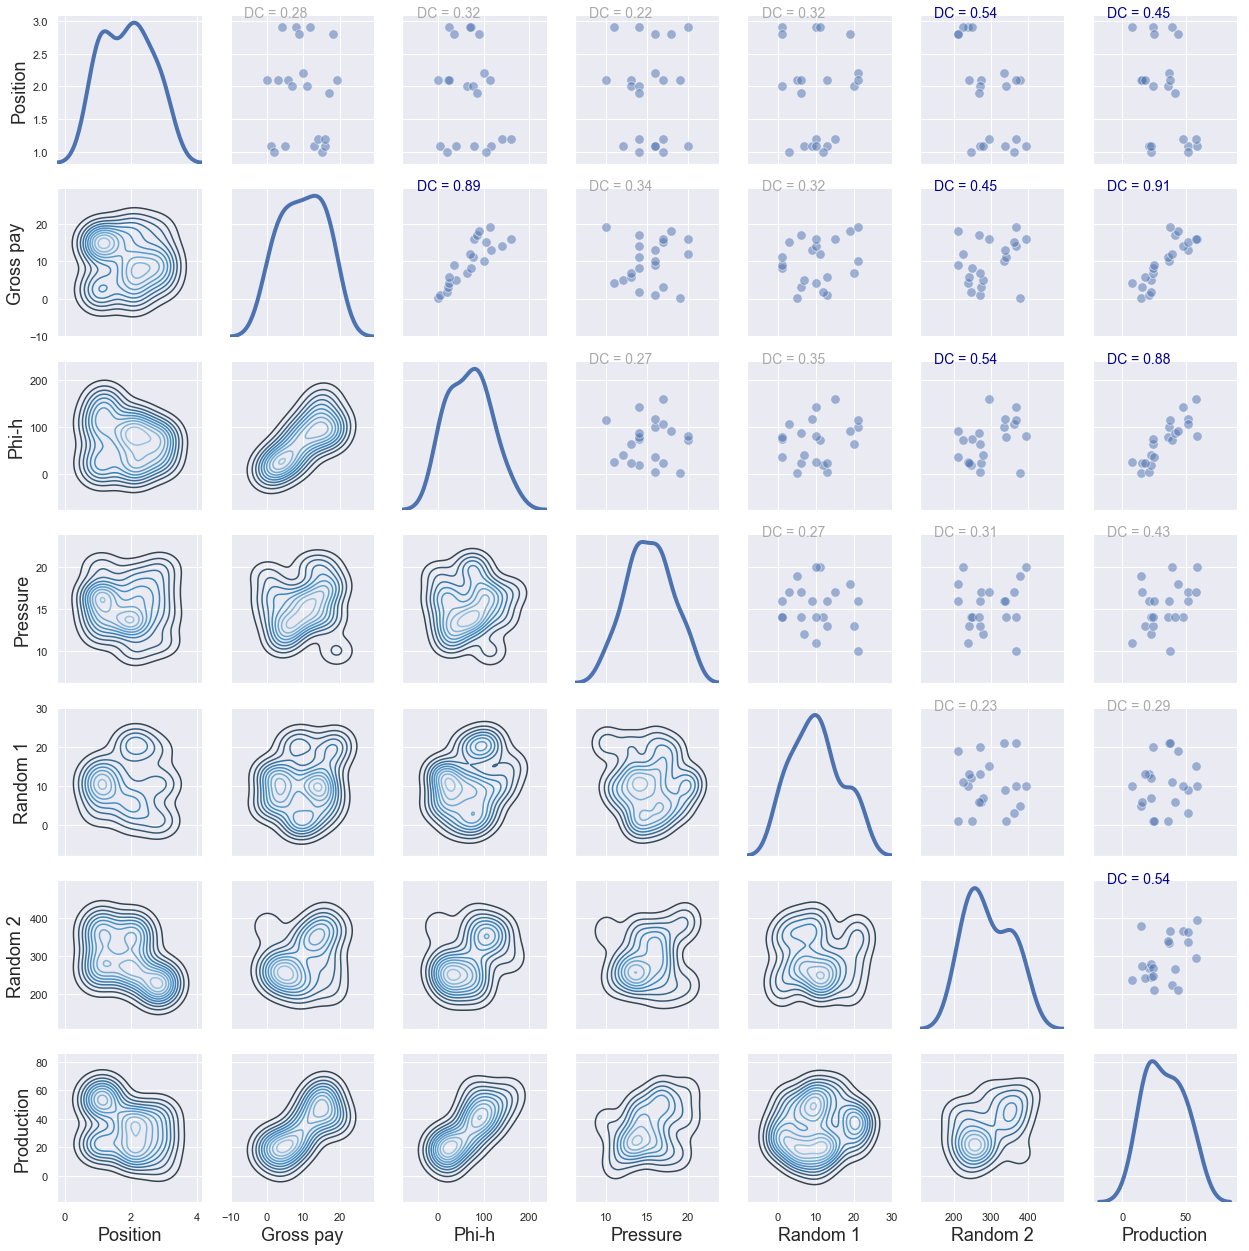

In [65]:
plt.rcParams["axes.labelsize"] = 18
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes

g.map_upper(plt.scatter,  linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)

g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")

#plt.savefig('matrix_final.png', dpi=500, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Seaborn da un risultato diverso. Cacca!!

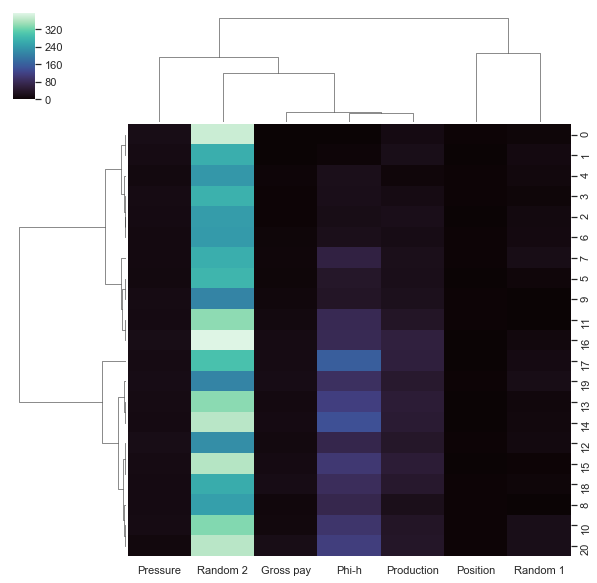

In [21]:
sns.set()
row_linkage, col_linkage = (hc.linkage(sp.distance.pdist(x, 'correlation'),method='complete', metric='euclidean')
  for x in (data.values, data.values.T))
g = sns.clustermap(data, row_linkage=row_linkage, col_linkage=col_linkage, cmap="mako") 

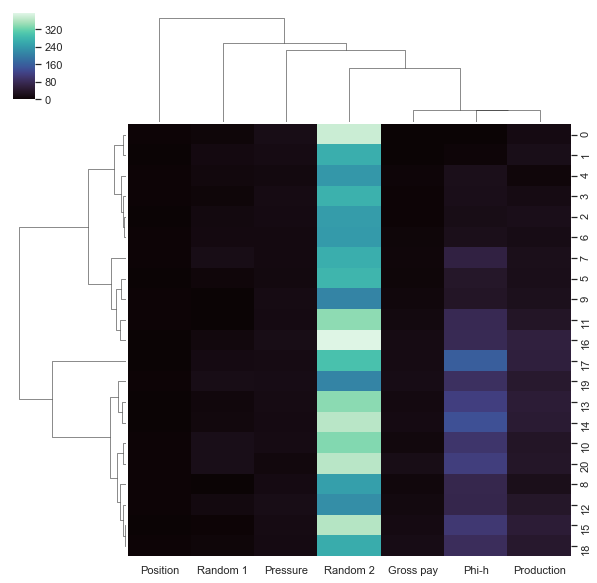

In [22]:
g = sns.clustermap(data, metric='correlation', cmap="mako") 

In [23]:
data

,Position,Gross pay,Phi-h,Pressure,Random 1,Random 2,Production
0,2.10,0.10,0.50,19,5,379,15.10
1,1.10,1.00,4.00,16,13,269,21.30
2,1.00,1.90,19.00,14,12,245,22.75
3,2.10,3.10,21.70,17,6,273,15.72
4,2.90,4.10,24.60,11,10,237,7.71
5,1.10,4.90,39.20,12,7,278,22.67
6,2.10,5.90,23.60,13,13,241,18.11
7,2.00,7.00,63.00,13,20,269,24.30
8,2.90,8.10,72.90,14,1,248,24.04
9,2.80,8.90,35.60,16,1,210,25.11


#### Old plots

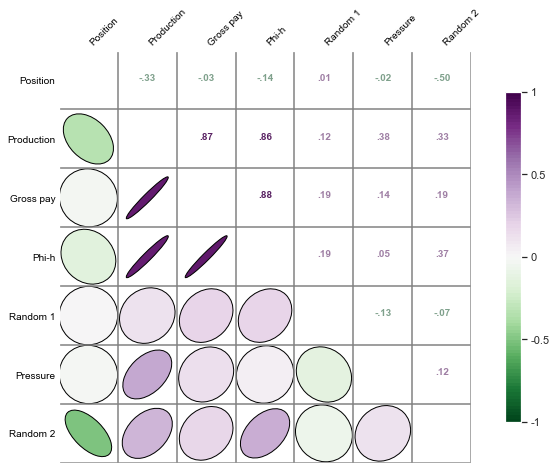

In [24]:
c.plot(method='ellipse', cmap='PRGn_r', shrink=1, rotation=45, upper='text', lower='ellipse')
fig = plt.gcf()
fig.set_size_inches(10, 8)
#plt.savefig('103_05-12_ellipses_cc_all_curv1.png', dpi=500, bbox_inches='tight', pad_inches=0.2)

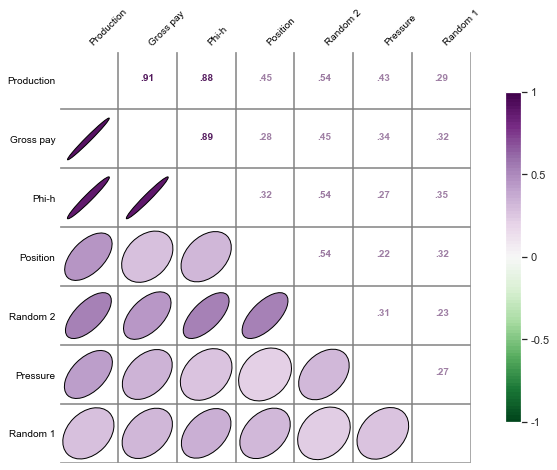

In [25]:
c1.plot(method='ellipse', cmap='PRGn_r', shrink=1, rotation=45, upper='text', lower='ellipse')
fig = plt.gcf()
fig.set_size_inches(10, 8)
#plt.savefig('103_05-12_ellipses_cc_all_curv1.png', dpi=500, bbox_inches='tight', pad_inches=0.2)